In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

# UVOD

Za projekt sem si izbral analizo smučarskih središč. S klasifikacijo sem želel napovedati kvaliteto smučišča, z regresijo pa cene dnevne karte za odrasle. Urejen dataset je vseboval 19 značilnic in  1561 instanc.



*   Name_resort = ime smučišča
*   Rate = ocena
*   Km_Freeride = kilometrina označenih freeride prog
*   Continent = kontinent
*   Country = država
*   Altitude = nadmorska višina
*   Easy = lahke proge (km)
*   Intermediate = srednje zahtevne proge (km)
*   Difficult = težke proge (km)
*   Adult = cena dnevne odrasle karte
*   Currency = valuta
*   Size = velikost smučišča
*   Slope_offering = ponudba prog
*   Lifts = vlečnice
*   Apres-ski
*   Snow_parks
*   Cross_country = proge za tek na smučeh
*   Latitude = geografska širina
*   Longitude = geografska dolžina
*   Total_KMs = skupna kilometrina vseh prog
*   Resort_Quality = Kvaliteta smučišča (Excellent, good, bad)



# 1. PRIDOBIVANJE PODATKOV

In [2]:
df = pd.read_csv("/content/drive/MyDrive/data/resortworldwide.csv", index_col=2, sep=",", decimal=".")
df.head()

,URL,Rate,Stars,Km Freeride,Continent,Country,State/Province,Altitude,Easy,Intermediate,...,Après-ski,Accommodation offering directly at the slopes and lifts,Families and children,Beginners,Snow parks,Cross-country skiing and trails,country,latitude,longitude,Total Kms
NameResort,,,,,,,,,,,,,,,,,,,,,
KitzSki – Kitzbühel/Kirchberg,http://www.skiresort.info/ski-resort/kitzski-k...,4.9,5.0,45.0,Europe,Austria,Tyrol (Tirol),2000.0,101.0,61.0,...,"4,0","5,0","5,0","5,0","5,0","5,0",AT,47.516231,14.550072,179
Ischgl/Samnaun – Silvretta Arena,http://www.skiresort.info/ski-resort/ischglsam...,4.8,5.0,15.0,Europe,Austria,Tyrol (Tirol),2872.0,47.0,142.0,...,"5,0","5,0","4,0","4,0","5,0","4,0",AT,47.516231,14.550072,238
SkiWelt Wilder Kaiser-Brixental,http://www.skiresort.info/ski-resort/skiwelt-w...,4.8,5.0,26.0,Europe,Austria,Tyrol (Tirol),1957.0,122.0,129.0,...,"4,0","4,0","5,0","5,0","5,0","5,0",AT,47.516231,14.550072,284
Ski Arlberg,http://www.skiresort.info/ski-resort/st-antons...,4.8,5.0,200.0,Europe,Austria,Tyrol (Tirol),2811.0,132.0,123.0,...,"5,0","5,0","5,0","5,0","4,0","4,0",AT,47.516231,14.550072,305
Serfaus-Fiss-Ladis,http://www.skiresort.info/ski-resort/serfaus-f...,4.8,5.0,28.0,Europe,Austria,Tyrol (Tirol),2820.0,47.0,123.0,...,"4,0","4,0","5,0","4,0","5,0","4,0",AT,47.516231,14.550072,198


# 2. PREDPROCESIRANJE PODATKOV

## 2.1 Urejanje podatkovne množice

In [3]:
df["Currency"].unique()

array(['European Euro', '-', 'Swiss Franc', 'Bulgarian Lev',
       'Serbian dinar', 'Norwegian krone', 'Swedish krona', nan,
       'Bosnia convertible mark', 'Czech koruna', 'Polish zloty',
       'Russian ruble', 'Ukrainian hryvnia', 'Icelandic krona',
       'Romanian leu', 'UK Pound', 'Macedonian denar', 'Danish Krone',
       'US Dollar', 'Iranian rial', 'Turkish lira', 'Japanese Yen',
       'Canadian Dollar', 'Chinese Yuan', 'South African rand',
       'Kazakhstani tenge', 'Kyrgyzstani som', 'Armenian Dram',
       'South Korean won', 'New Zealand Dollar', 'Chiliean Peso',
       'Indian rupee', 'Georgian Lari', 'Hungarian forint',
       'Argentine Peso', 'United Arab Emerites', 'Croatian Kuna',
       'Australian dollar', 'Lebanese pound', 'Israeli new shekel',
       'Azerbaijani manat', 'unknown', 'Mongolian togrog'], dtype=object)

Urejanje imen značilnic, ki imajo presledke

In [4]:
df.columns = [col.replace(' ', '_') for col in df.columns]

Brisanje nepotrebnih značilnic

In [5]:
df.drop(["URL", "State/Province", "country", "Accommodation_offering_directly_at_the_slopes_and_lifts_", "Families_and_children_", "Beginners_"], axis=1, inplace=True)

In [6]:
df.drop(["Orientation_(trail_map,_information_boards,_sign-postings)_", "Cleanliness_and_hygiene_", "Environmentally_friendly_ski_operation_", "Mountain_restaurants,_ski_huts,_gastronomy_"], axis=1, inplace=True)

In [7]:
df.drop(["Snow_reliability_","Access,_on-site_parking_"], axis=1, inplace=True)

Urejanje smučišč na podlagi valut za lažje procesiranje

In [8]:
valute_za_obdrzat = ['European Euro', 'Swiss Franc', 'US Dollar', 'Japanese Yen' 'Canadian Dollar']
mask = df["Currency"].isin(valute_za_obdrzat)

df_filtriran = df[mask]

In [9]:
df_filtriran.head()

,Rate,Stars,Km_Freeride,Continent,Country,Altitude,Easy,Intermediate_,Difficult,Adult,Currency,Ski_resort_size_,"Slope_offering,_variety_of_runs_",Lifts_and_cable_cars_,Après-ski_,Snow_parks_,Cross-country_skiing_and_trails_,latitude,longitude,Total_Kms
NameResort,,,,,,,,,,,,,,,,,,,,
KitzSki – Kitzbühel/Kirchberg,4.9,5.0,45.0,Europe,Austria,2000.0,101.0,61.0,17.0,55,European Euro,"5,0",5.0,"5,0","4,0","5,0","5,0",47.516231,14.550072,179
Ischgl/Samnaun – Silvretta Arena,4.8,5.0,15.0,Europe,Austria,2872.0,47.0,142.0,49.0,53,European Euro,"5,0",5.0,"5,0","5,0","5,0","4,0",47.516231,14.550072,238
SkiWelt Wilder Kaiser-Brixental,4.8,5.0,26.0,Europe,Austria,1957.0,122.0,129.0,33.0,49,European Euro,"5,0",5.0,"5,0","4,0","5,0","5,0",47.516231,14.550072,284
Ski Arlberg,4.8,5.0,200.0,Europe,Austria,2811.0,132.0,123.0,50.0,53,European Euro,"5,0",5.0,"5,0","5,0","4,0","4,0",47.516231,14.550072,305
Serfaus-Fiss-Ladis,4.8,5.0,28.0,Europe,Austria,2820.0,47.0,123.0,28.0,51,European Euro,"5,0",5.0,"5,0","4,0","5,0","4,0",47.516231,14.550072,198


In [ ]:
df_filtriran["Currency"].unique()

array(['European Euro', 'Swiss Franc', 'US Dollar'], dtype=object)

In [ ]:
df_filtriran.shape

(2192, 20)

In [ ]:
print(df_filtriran.isnull().sum())

Rate                                 317
Stars                               1849
Km_Freeride                         1816
Continent                              0
Country                                0
Altitude                               0
Easy                                   0
Intermediate_                          0
Difficult                              0
Adult                                  0
Currency                               0
Ski_resort_size_                     323
Slope_offering,_variety_of_runs_     323
Lifts_and_cable_cars_                323
Après-ski_                          1847
Snow_parks_                         1847
Cross-country_skiing_and_trails_    1847
latitude                             434
longitude                            434
Total_Kms                              0
dtype: int64


Za rangiranje bom upošteval Rang ne pa Stars

In [10]:
df_filtriran.drop(["Stars"], axis=1, inplace=True)

<ipython-input-10-cfa5659b1c99>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtriran.drop(["Stars"], axis=1, inplace=True)


In [ ]:
file_path = "/content/drive/MyDrive/data/ski_resorts_filtrirano.csv"
df_filtriran.to_csv(file_path, sep=",", decimal=".")

In [ ]:
print(df_filtriran.isnull().sum())

Rate                                 317
Km_Freeride                         1816
Continent                              0
Country                                0
Altitude                               0
Easy                                   0
Intermediate_                          0
Difficult                              0
Adult                                  0
Currency                               0
Ski_resort_size_                     323
Slope_offering,_variety_of_runs_     323
Lifts_and_cable_cars_                323
Après-ski_                          1847
Snow_parks_                         1847
Cross-country_skiing_and_trails_    1847
latitude                             434
longitude                            434
Total_Kms                              0
dtype: int64


Brisanje instanc, ki nimajo podatka za naslednje značilnice


*   Rate
*   Lifts_and_cable_cars_
*   Latitude
*   Longitude



In [11]:
df_filtriran.dropna(subset=["Rate"], inplace=True)
df_filtriran.dropna(subset=["Lifts_and_cable_cars_"], inplace=True)
df_filtriran.dropna(subset=["latitude"], inplace=True)
df_filtriran.dropna(subset=["longitude"], inplace=True)

df_filtriran.head(3)

<ipython-input-11-2bfd6e6b4f0b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtriran.dropna(subset=["Rate"], inplace=True)
<ipython-input-11-2bfd6e6b4f0b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtriran.dropna(subset=["Lifts_and_cable_cars_"], inplace=True)
<ipython-input-11-2bfd6e6b4f0b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtriran.dropna(subset=["latitude"], inplace=True)
<ipython-input-11-2bfd

,Rate,Km_Freeride,Continent,Country,Altitude,Easy,Intermediate_,Difficult,Adult,Currency,Ski_resort_size_,"Slope_offering,_variety_of_runs_",Lifts_and_cable_cars_,Après-ski_,Snow_parks_,Cross-country_skiing_and_trails_,latitude,longitude,Total_Kms
NameResort,,,,,,,,,,,,,,,,,,,
KitzSki – Kitzbühel/Kirchberg,4.9,45.0,Europe,Austria,2000.0,101.0,61.0,17.0,55,European Euro,"5,0",5.0,"5,0","4,0","5,0","5,0",47.516231,14.550072,179
Ischgl/Samnaun – Silvretta Arena,4.8,15.0,Europe,Austria,2872.0,47.0,142.0,49.0,53,European Euro,"5,0",5.0,"5,0","5,0","5,0","4,0",47.516231,14.550072,238
SkiWelt Wilder Kaiser-Brixental,4.8,26.0,Europe,Austria,1957.0,122.0,129.0,33.0,49,European Euro,"5,0",5.0,"5,0","4,0","5,0","5,0",47.516231,14.550072,284


In [ ]:
print(df_filtriran.isnull().sum())

Rate                                   0
Km_Freeride                         1206
Continent                              0
Country                                0
Altitude                               0
Easy                                   0
Intermediate_                          0
Difficult                              0
Adult                                  0
Currency                               0
Ski_resort_size_                       0
Slope_offering,_variety_of_runs_       0
Lifts_and_cable_cars_                  0
Après-ski_                          1236
Snow_parks_                         1236
Cross-country_skiing_and_trails_    1236
latitude                               0
longitude                              0
Total_Kms                              0
dtype: int64


In [ ]:
df_filtriran.shape

(1561, 19)

In [ ]:
df_filtriran.tail(10)

,Rate,Km_Freeride,Continent,Country,Altitude,Easy,Intermediate_,Difficult,Adult,Currency,Ski_resort_size_,"Slope_offering,_variety_of_runs_",Lifts_and_cable_cars_,Après-ski_,Snow_parks_,Cross-country_skiing_and_trails_,latitude,longitude,Total_Kms
NameResort,,,,,,,,,,,,,,,,,,,
. Snow Arena – Druskininkai (indoor ski area),2.7,0.0,Europe,Lithuania,163.0,1.2,0.0,0.0,29,European Euro,"1,0",2.0,"3,0","3,0","4,0","1,0",55.169438,23.881275,1
liepkalnis-vilnius-ziemos-trasa,1.3,NaN,Europe,Lithuania,215.0,0.8,0.5,0.2,15,European Euro,"1,3",1.6,"1,5",NaN,NaN,NaN,55.169438,23.881275,1
. Snow Valley – Peer (indoor ski area),1.0,0.0,Europe,Belgium,102.0,0.3,0.1,0.0,38,European Euro,"1,0",2.0,"1,0","3,0","4,0","1,0",50.503887,4.469936,0
. Ice Mountain (indoor ski area),1.0,0.0,Europe,Belgium,90.0,0.3,0.0,0.0,41,European Euro,"1,0",1.0,"1,0","2,0","3,0","1,0",50.503887,4.469936,0
aspen-antwerpen,1.0,NaN,Europe,Belgium,64.0,0.1,0.1,0.0,45,European Euro,"1,0",1.0,"1,0",NaN,NaN,NaN,50.503887,4.469936,0
thier-des-rexhons-spa,1.2,NaN,Europe,Belgium,530.0,0.6,0.0,0.0,12,European Euro,"1,2",1.0,"1,5",NaN,NaN,NaN,50.503887,4.469936,0
val-de-wanne,1.3,NaN,Europe,Belgium,480.0,0.6,0.8,0.0,14,European Euro,"1,3",1.3,"1,5",NaN,NaN,NaN,50.503887,4.469936,1
vimka-viimsi-maeepark,1.1,NaN,Europe,Estonia,51.0,0.3,0.0,0.0,18,European Euro,"1,1",1.0,"1,5",NaN,NaN,NaN,58.595272,25.013607,0
serra-da-estrela,1.7,NaN,Europe,Portugal,1968.0,2.4,2.5,1.0,25,European Euro,"1,7",2.0,"2,8",NaN,NaN,NaN,39.399872,-8.224454,5


Dopolnjevanje naslednjih značilnic


*   Km_Freeride: če ni bilo podatka, sem sklepal da smučišče nima označenih freeride prog
*   Après-ski_: Če ni bilo podatka, se ocena nastavi na 1
*   Snow_parks: Če ni bilo podatka, se ocena nastavi na 1
*   Cross-country_skiing_and_trails_: Če ni bilo podatka, se ocena nastavi na 1



In [12]:
df_filtriran["Km_Freeride"].fillna(0, inplace=True)
df_filtriran["Après-ski_"].fillna(1, inplace=True)
df_filtriran["Snow_parks_"].fillna(1, inplace=True)
df_filtriran["Cross-country_skiing_and_trails_"].fillna(1, inplace=True)

<ipython-input-12-74d562d9168b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtriran["Km_Freeride"].fillna(0, inplace=True)
<ipython-input-12-74d562d9168b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtriran["Après-ski_"].fillna(1, inplace=True)
<ipython-input-12-74d562d9168b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtriran["Snow_parks_"].fillna(1, inplace=True)
<ipython-input-12-74d562d9168b>:4: Settin

In [ ]:
df_filtriran.tail(10)

,Rate,Km_Freeride,Continent,Country,Altitude,Easy,Intermediate_,Difficult,Adult,Currency,Ski_resort_size_,"Slope_offering,_variety_of_runs_",Lifts_and_cable_cars_,Après-ski_,Snow_parks_,Cross-country_skiing_and_trails_,latitude,longitude,Total_Kms
NameResort,,,,,,,,,,,,,,,,,,,
. Snow Arena – Druskininkai (indoor ski area),2.7,0.0,Europe,Lithuania,163.0,1.2,0.0,0.0,29,European Euro,"1,0",2.0,"3,0","3,0","4,0","1,0",55.169438,23.881275,1
liepkalnis-vilnius-ziemos-trasa,1.3,0.0,Europe,Lithuania,215.0,0.8,0.5,0.2,15,European Euro,"1,3",1.6,"1,5",1,1,1,55.169438,23.881275,1
. Snow Valley – Peer (indoor ski area),1.0,0.0,Europe,Belgium,102.0,0.3,0.1,0.0,38,European Euro,"1,0",2.0,"1,0","3,0","4,0","1,0",50.503887,4.469936,0
. Ice Mountain (indoor ski area),1.0,0.0,Europe,Belgium,90.0,0.3,0.0,0.0,41,European Euro,"1,0",1.0,"1,0","2,0","3,0","1,0",50.503887,4.469936,0
aspen-antwerpen,1.0,0.0,Europe,Belgium,64.0,0.1,0.1,0.0,45,European Euro,"1,0",1.0,"1,0",1,1,1,50.503887,4.469936,0
thier-des-rexhons-spa,1.2,0.0,Europe,Belgium,530.0,0.6,0.0,0.0,12,European Euro,"1,2",1.0,"1,5",1,1,1,50.503887,4.469936,0
val-de-wanne,1.3,0.0,Europe,Belgium,480.0,0.6,0.8,0.0,14,European Euro,"1,3",1.3,"1,5",1,1,1,50.503887,4.469936,1
vimka-viimsi-maeepark,1.1,0.0,Europe,Estonia,51.0,0.3,0.0,0.0,18,European Euro,"1,1",1.0,"1,5",1,1,1,58.595272,25.013607,0
serra-da-estrela,1.7,0.0,Europe,Portugal,1968.0,2.4,2.5,1.0,25,European Euro,"1,7",2.0,"2,8",1,1,1,39.399872,-8.224454,5


In [ ]:
print(df_filtriran.isnull().sum())

Rate                                0
Km_Freeride                         0
Continent                           0
Country                             0
Altitude                            0
Easy                                0
Intermediate_                       0
Difficult                           0
Adult                               0
Currency                            0
Ski_resort_size_                    0
Slope_offering,_variety_of_runs_    0
Lifts_and_cable_cars_               0
Après-ski_                          0
Snow_parks_                         0
Cross-country_skiing_and_trails_    0
latitude                            0
longitude                           0
Total_Kms                           0
dtype: int64


V podatkovni množici ni več manjkajočih vrednosti

In [ ]:
df_filtriran.shape

(1561, 19)

In [ ]:
file_path = "/content/drive/MyDrive/data/ski_resorts_FINAL.csv"
df_filtriran.to_csv(file_path, sep=",", decimal=".")

končni dataframe se shrani

In [13]:
df_filtriran.rename(columns={"Ski_resort_size_": "Size", "Slope_offering,_variety_of_runs_": "Slope_offering", "Lifts_and_cable_cars_": "Lifts", "Cross-country_skiing_and_trails_": "Cross_country"}, inplace=True)

<ipython-input-13-fa3ab18de0be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtriran.rename(columns={"Ski_resort_size_": "Size", "Slope_offering,_variety_of_runs_": "Slope_offering", "Lifts_and_cable_cars_": "Lifts", "Cross-country_skiing_and_trails_": "Cross_country"}, inplace=True)


preimenovanje določenih značilnic, za boljšo preglednost

In [ ]:
file_path = "/content/drive/MyDrive/data/ski_resorts_FINAL_2.0.csv"
df_filtriran.to_csv(file_path, sep=",", decimal=".")

## 2.2 Dodajanje instanc (Feature engineering)

Funkcija za dodajanje vrednosti

In [14]:
def dodeli_kvaliteto(rank):
  if rank > 3.7:
    return "Excellent"
  elif 2.2 <= rank <= 3.7:
    return "Good"
  else:
    return "Bad"

df_filtriran["Resort_Quality"] = df_filtriran["Rate"].apply(dodeli_kvaliteto)

<ipython-input-14-a16ce4382052>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtriran["Resort_Quality"] = df_filtriran["Rate"].apply(dodeli_kvaliteto)


In [ ]:
df_filtriran.tail()

,Rate,Km_Freeride,Continent,Country,Altitude,Easy,Intermediate_,Difficult,Adult,Currency,Size,Slope_offering,Lifts,Après-ski_,Snow_parks_,Cross_country,latitude,longitude,Total_Kms,Resort_Quality
NameResort,,,,,,,,,,,,,,,,,,,,
thier-des-rexhons-spa,1.2,0.0,Europe,Belgium,530.0,0.6,0.0,0.0,12,European Euro,"1,2",1.0,"1,5",1,1,1,50.503887,4.469936,0,Bad
val-de-wanne,1.3,0.0,Europe,Belgium,480.0,0.6,0.8,0.0,14,European Euro,"1,3",1.3,"1,5",1,1,1,50.503887,4.469936,1,Bad
vimka-viimsi-maeepark,1.1,0.0,Europe,Estonia,51.0,0.3,0.0,0.0,18,European Euro,"1,1",1.0,"1,5",1,1,1,58.595272,25.013607,0,Bad
serra-da-estrela,1.7,0.0,Europe,Portugal,1968.0,2.4,2.5,1.0,25,European Euro,"1,7",2.0,"2,8",1,1,1,39.399872,-8.224454,5,Bad
troodos-mount-olympos,1.5,0.0,Asia,Cyprus,1951.0,1.0,2.0,1.0,18,European Euro,"1,5",1.9,"2,6",1,1,1,35.126413,33.429859,4,Bad


In [ ]:
print(df_filtriran["Resort_Quality"].value_counts())

Bad          961
Good         453
Excellent    147
Name: Resort_Quality, dtype: int64


961/1561=0.615 => klasifikacija mora biti bolj natančna

In [ ]:
file_path = "/content/drive/MyDrive/data/ski_resorts_QUALITY.csv"
df_filtriran.to_csv(file_path, sep=",", decimal=".")

# 3. VIZUALIZACIJA PODATKOV

## Popravek

In [ ]:
df1=pd.read_csv("/content/drive/MyDrive/data/ski_resorts_QUALITY.csv", index_col=0, sep=",", decimal=".")
df1.head(1)

,Rate,Km_Freeride,Continent,Country,Altitude,Easy,Intermediate_,Difficult,Adult,Currency,Size,Slope_offering,Lifts,Après-ski_,Snow_parks_,Cross_country,latitude,longitude,Total_Kms,Resort_Quality
NameResort,,,,,,,,,,,,,,,,,,,,
KitzSki – Kitzbühel/Kirchberg,4.9,45.0,Europe,Austria,2000.0,101.0,61.0,17.0,55,European Euro,"5,0",5.0,"5,0","4,0","5,0","5,0",47.516231,14.550072,179,Excellent


določeni stoplci v df so namesto pike za decimalko imeli vejico, tu se to popravi

In [ ]:
stolpci_za_menjat = ["Adult", "Size", "Lifts", "Après-ski_", "Snow_parks_", "Cross_country"]
df1[stolpci_za_menjat] = df1[stolpci_za_menjat].replace(',', '.', regex=True)
df1.head()

,Rate,Km_Freeride,Continent,Country,Altitude,Easy,Intermediate_,Difficult,Adult,Currency,Size,Slope_offering,Lifts,Après-ski_,Snow_parks_,Cross_country,latitude,longitude,Total_Kms,Resort_Quality
NameResort,,,,,,,,,,,,,,,,,,,,
KitzSki – Kitzbühel/Kirchberg,4.9,45.0,Europe,Austria,2000.0,101.0,61.0,17.0,55,European Euro,5.0,5.0,5.0,4.0,5.0,5.0,47.516231,14.550072,179,Excellent
Ischgl/Samnaun – Silvretta Arena,4.8,15.0,Europe,Austria,2872.0,47.0,142.0,49.0,53,European Euro,5.0,5.0,5.0,5.0,5.0,4.0,47.516231,14.550072,238,Excellent
SkiWelt Wilder Kaiser-Brixental,4.8,26.0,Europe,Austria,1957.0,122.0,129.0,33.0,49,European Euro,5.0,5.0,5.0,4.0,5.0,5.0,47.516231,14.550072,284,Excellent
Ski Arlberg,4.8,200.0,Europe,Austria,2811.0,132.0,123.0,50.0,53,European Euro,5.0,5.0,5.0,5.0,4.0,4.0,47.516231,14.550072,305,Excellent
Serfaus-Fiss-Ladis,4.8,28.0,Europe,Austria,2820.0,47.0,123.0,28.0,51,European Euro,5.0,5.0,5.0,4.0,5.0,4.0,47.516231,14.550072,198,Excellent


In [ ]:
file_path = "/content/drive/MyDrive/data/ski_resorts_3.0.csv"
df1.to_csv(file_path, sep=",", decimal=".")

## 3.1 Enostavnejše vizualizacije

In [ ]:
import pandas as pd

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
df_viz=pd.read_csv("/content/drive/MyDrive/data/ski_resorts_3.0.csv", index_col=0, sep=",", decimal=".")
df_viz.head(3)

In [ ]:
df_viz.shape

In [ ]:
df_viz.drop(df_viz[(df_viz["Rate"] == 0) & (df_viz["Size"] == 0)].index, inplace=True)

In [ ]:
df_viz.shape

In [ ]:
file_path = "/content/drive/MyDrive/data/ski_resorts_4.0.csv"
df_viz.to_csv(file_path, sep=",", decimal=".")

In [ ]:
df_viz=pd.read_csv("/content/drive/MyDrive/data/ski_resorts_4.0.csv", index_col=0, sep=",", decimal=".")

<Axes: xlabel='Rate'>

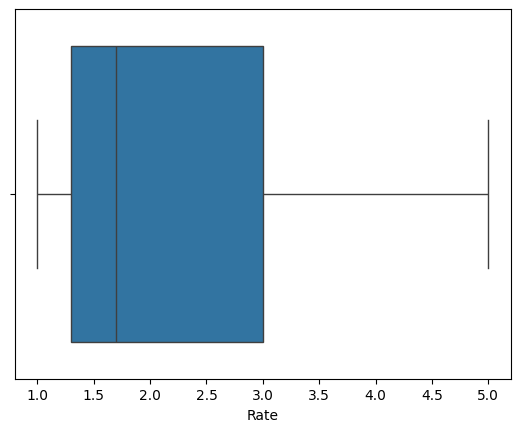

In [ ]:
sns.boxplot(data=df_viz, x="Rate")

<Axes: xlabel='Resort_Quality', ylabel='count'>

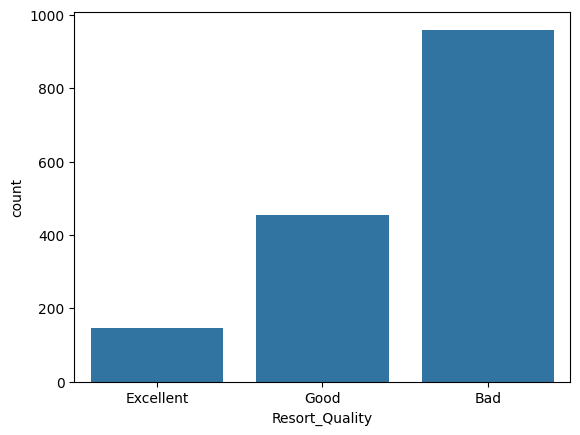

In [ ]:
sns.countplot(data=df_viz, x="Resort_Quality")

<Axes: xlabel='Size', ylabel='Rate'>

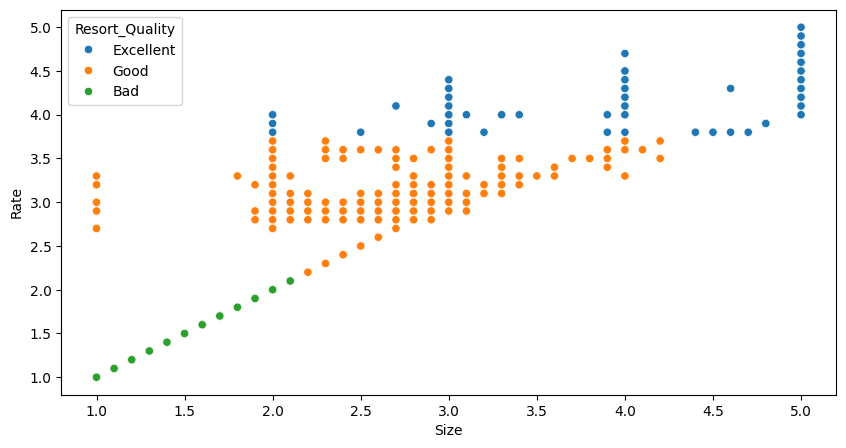

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="Size", y="Rate", data=df_viz, hue="Resort_Quality")

vidimo, da velikost smučišča pomembno vpliva na njegovo oceno (rate)

In [ ]:
df_copy = df_viz.copy(deep=True)
df_copy.head(3)

,Rate,Km_Freeride,Continent,Country,Altitude,Easy,Intermediate_,Difficult,Adult,Currency,Size,Slope_offering,Lifts,Après-ski_,Snow_parks_,Cross_country,latitude,longitude,Total_Kms,Resort_Quality
NameResort,,,,,,,,,,,,,,,,,,,,
KitzSki – Kitzbühel/Kirchberg,4.9,45.0,Europe,Austria,2000.0,101.0,61.0,17.0,55.0,European Euro,5.0,5.0,5.0,4.0,5.0,5.0,47.516231,14.550072,179,Excellent
Ischgl/Samnaun – Silvretta Arena,4.8,15.0,Europe,Austria,2872.0,47.0,142.0,49.0,53.0,European Euro,5.0,5.0,5.0,5.0,5.0,4.0,47.516231,14.550072,238,Excellent
SkiWelt Wilder Kaiser-Brixental,4.8,26.0,Europe,Austria,1957.0,122.0,129.0,33.0,49.0,European Euro,5.0,5.0,5.0,4.0,5.0,5.0,47.516231,14.550072,284,Excellent


In [ ]:
df_copy.shape

In [ ]:
kategoricni = df_copy.select_dtypes(include="object").columns
print(kategoricni)

Index(['Continent', 'Country', 'Currency', 'Resort_Quality'], dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder

for k in kategoricni:
  df_copy[k] = LabelEncoder().fit_transform(df_copy[k])

df_copy.head(3)

,Rate,Km_Freeride,Continent,Country,Altitude,Easy,Intermediate_,Difficult,Adult,Currency,Size,Slope_offering,Lifts,Après-ski_,Snow_parks_,Cross_country,latitude,longitude,Total_Kms,Resort_Quality
NameResort,,,,,,,,,,,,,,,,,,,,
KitzSki – Kitzbühel/Kirchberg,4.9,45.0,1,1,2000.0,101.0,61.0,17.0,55.0,0,5.0,5.0,5.0,4.0,5.0,5.0,47.516231,14.550072,179,1
Ischgl/Samnaun – Silvretta Arena,4.8,15.0,1,1,2872.0,47.0,142.0,49.0,53.0,0,5.0,5.0,5.0,5.0,5.0,4.0,47.516231,14.550072,238,1
SkiWelt Wilder Kaiser-Brixental,4.8,26.0,1,1,1957.0,122.0,129.0,33.0,49.0,0,5.0,5.0,5.0,4.0,5.0,5.0,47.516231,14.550072,284,1


<Axes: >

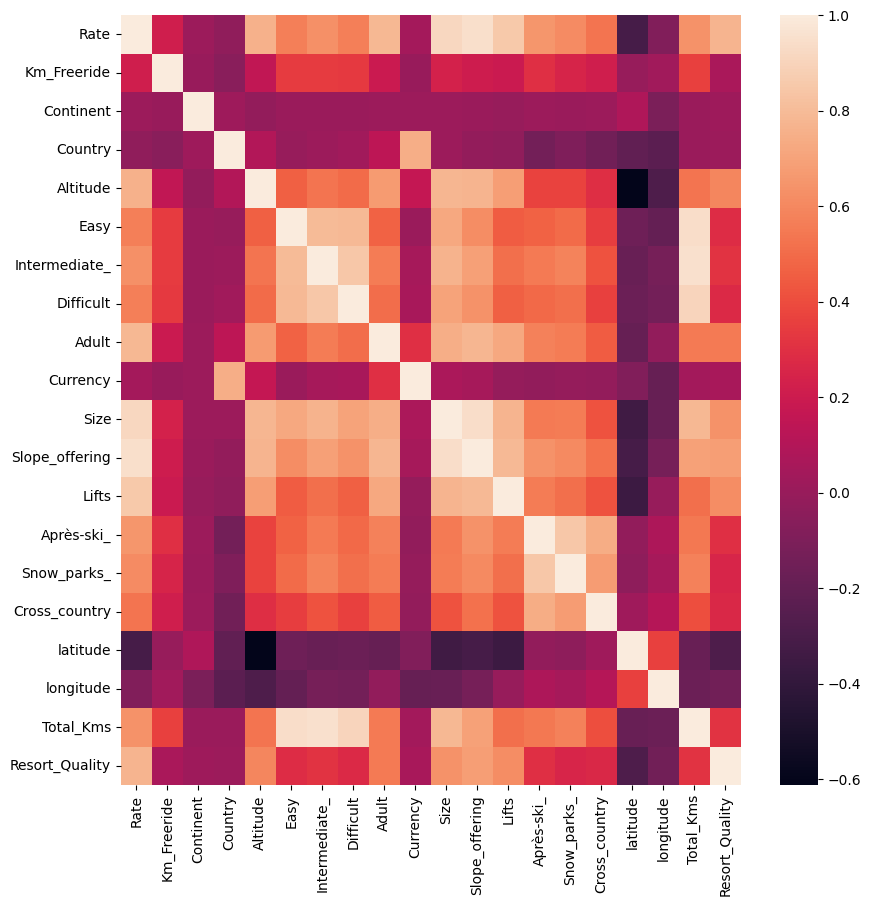

In [ ]:
corr = df_copy.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr)

In [ ]:
from sklearn.decomposition import FastICA

transform = FastICA(n_components=2).fit_transform(df_copy)
dfTransform=pd.DataFrame(transform, columns=("Col1", "Col2"))
dfTransform.head()

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


,Col1,Col2
0,-0.006475,-0.099621
1,0.019618,-0.122491
2,-0.025355,-0.167183
3,0.004681,-0.172053
4,0.023557,-0.099666


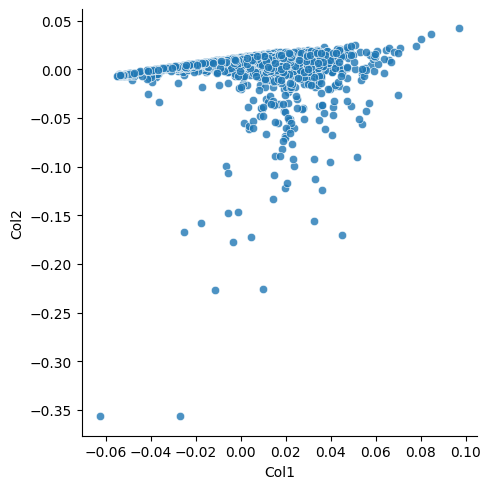

In [ ]:
sns.relplot(x="Col1", y="Col2", data=dfTransform, alpha=.8)

## 3.2 Kompleksnejša in pomenska vizualizacija

In [ ]:
grupiran_df = df_viz.groupby("Resort_Quality")
grupiran_df.head(3)

,Rate,Km_Freeride,Continent,Country,Altitude,Easy,Intermediate_,Difficult,Adult,Currency,Size,Slope_offering,Lifts,Après-ski_,Snow_parks_,Cross_country,latitude,longitude,Total_Kms,Resort_Quality
NameResort,,,,,,,,,,,,,,,,,,,,
KitzSki – Kitzbühel/Kirchberg,4.9,45.0,Europe,Austria,2000.0,101.0,61.0,17.0,55.0,European Euro,5.0,5.0,5.0,4.0,5.0,5.0,47.516231,14.550072,179,Excellent
Ischgl/Samnaun – Silvretta Arena,4.8,15.0,Europe,Austria,2872.0,47.0,142.0,49.0,53.0,European Euro,5.0,5.0,5.0,5.0,5.0,4.0,47.516231,14.550072,238,Excellent
SkiWelt Wilder Kaiser-Brixental,4.8,26.0,Europe,Austria,1957.0,122.0,129.0,33.0,49.0,European Euro,5.0,5.0,5.0,4.0,5.0,5.0,47.516231,14.550072,284,Excellent
. Schlick 2000 – Fulpmes,3.7,1.5,Europe,Austria,2240.0,12.0,6.8,3.2,38.5,European Euro,3.0,4.0,4.0,3.0,2.0,2.0,47.516231,14.550072,22,Good
See,3.7,0.0,Europe,Austria,2456.0,8.0,25.0,8.0,40.5,European Euro,3.0,4.0,4.0,3.0,1.0,1.0,47.516231,14.550072,41,Good
Loser – Altaussee,3.7,0.0,Europe,Austria,1770.0,18.0,12.0,3.0,41.0,European Euro,3.0,4.0,4.0,3.0,2.0,3.0,47.516231,14.550072,33,Good
. Tirolina (Haltjochlift) – Hinterthiersee,1.0,0.0,Europe,Austria,1077.0,2.0,1.2,0.8,18.0,European Euro,1.0,2.0,2.0,1.0,1.0,3.0,47.516231,14.550072,4,Bad
. Trins,1.0,0.0,Europe,Austria,1268.0,1.0,0.0,0.0,11.5,European Euro,1.0,1.0,1.0,2.0,1.0,5.0,47.516231,14.550072,1,Bad
. Archenstadel – Rinn,1.0,0.0,Europe,Austria,1004.0,1.0,0.0,0.0,14.0,European Euro,1.0,1.0,1.0,1.0,3.0,3.0,47.516231,14.550072,1,Bad


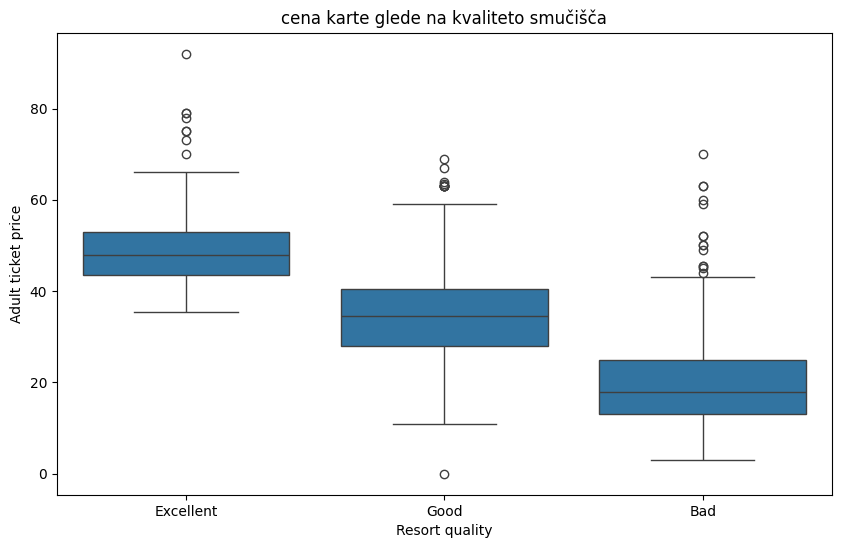

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Resort_Quality", y="Adult", data=df_viz, order=["Excellent", "Good", "Bad"])

plt.xlabel("Resort quality")
plt.ylabel("Adult ticket price")
plt.title("cena karte glede na kvaliteto smučišča")

plt.show()

# 4. GRUČENJE

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/data/ski_resorts_4.0.csv", index_col=0, sep=",", decimal=".")
df.head()

,Rate,Km_Freeride,Continent,Country,Altitude,Easy,Intermediate_,Difficult,Adult,Currency,Size,Slope_offering,Lifts,Après-ski_,Snow_parks_,Cross_country,latitude,longitude,Total_Kms,Resort_Quality
NameResort,,,,,,,,,,,,,,,,,,,,
KitzSki – Kitzbühel/Kirchberg,4.9,45.0,Europe,Austria,2000.0,101.0,61.0,17.0,55.0,European Euro,5.0,5.0,5.0,4.0,5.0,5.0,47.516231,14.550072,179,Excellent
Ischgl/Samnaun – Silvretta Arena,4.8,15.0,Europe,Austria,2872.0,47.0,142.0,49.0,53.0,European Euro,5.0,5.0,5.0,5.0,5.0,4.0,47.516231,14.550072,238,Excellent
SkiWelt Wilder Kaiser-Brixental,4.8,26.0,Europe,Austria,1957.0,122.0,129.0,33.0,49.0,European Euro,5.0,5.0,5.0,4.0,5.0,5.0,47.516231,14.550072,284,Excellent
Ski Arlberg,4.8,200.0,Europe,Austria,2811.0,132.0,123.0,50.0,53.0,European Euro,5.0,5.0,5.0,5.0,4.0,4.0,47.516231,14.550072,305,Excellent
Serfaus-Fiss-Ladis,4.8,28.0,Europe,Austria,2820.0,47.0,123.0,28.0,51.0,European Euro,5.0,5.0,5.0,4.0,5.0,4.0,47.516231,14.550072,198,Excellent


In [ ]:
print(df.isnull().sum())

In [ ]:
df1 = df.copy(deep=True)
df1.head(3)

,Rate,Km_Freeride,Continent,Country,Altitude,Easy,Intermediate_,Difficult,Adult,Currency,Size,Slope_offering,Lifts,Après-ski_,Snow_parks_,Cross_country,latitude,longitude,Total_Kms,Resort_Quality
NameResort,,,,,,,,,,,,,,,,,,,,
KitzSki – Kitzbühel/Kirchberg,4.9,45.0,Europe,Austria,2000.0,101.0,61.0,17.0,55.0,European Euro,5.0,5.0,5.0,4.0,5.0,5.0,47.516231,14.550072,179,Excellent
Ischgl/Samnaun – Silvretta Arena,4.8,15.0,Europe,Austria,2872.0,47.0,142.0,49.0,53.0,European Euro,5.0,5.0,5.0,5.0,5.0,4.0,47.516231,14.550072,238,Excellent
SkiWelt Wilder Kaiser-Brixental,4.8,26.0,Europe,Austria,1957.0,122.0,129.0,33.0,49.0,European Euro,5.0,5.0,5.0,4.0,5.0,5.0,47.516231,14.550072,284,Excellent


In [ ]:
kategoricni = df1.select_dtypes(include="object").columns
stevilski = df1.select_dtypes(exclude="object").columns

print(kategoricni)
print(stevilski)

Index(['Continent', 'Country', 'Currency', 'Resort_Quality'], dtype='object')
Index(['Rate', 'Km_Freeride', 'Altitude', 'Easy', 'Intermediate_', 'Difficult',
       'Adult', 'Size', 'Slope_offering', 'Lifts', 'Après-ski_', 'Snow_parks_',
       'Cross_country', 'latitude', 'longitude', 'Total_Kms'],
      dtype='object')


Standardizacija stevilskih podatkov

In [ ]:
from sklearn.preprocessing import StandardScaler

df1[stevilski] = StandardScaler().fit_transform(df1[stevilski])
df1.head(3)

,Rate,Km_Freeride,Continent,Country,Altitude,Easy,Intermediate_,Difficult,Adult,Currency,Size,Slope_offering,Lifts,Après-ski_,Snow_parks_,Cross_country,latitude,longitude,Total_Kms,Resort_Quality
NameResort,,,,,,,,,,,,,,,,,,,,
KitzSki – Kitzbühel/Kirchberg,2.660039,7.745664,Europe,Austria,0.728344,4.691884,2.521460,2.134006,2.029985,European Euro,3.274654,2.504437,2.532156,3.121436,3.679638,3.476090,-0.01722,0.708571,3.596982,Excellent
Ischgl/Samnaun – Silvretta Arena,2.563853,2.511298,Europe,Austria,1.950779,1.958186,6.443805,6.859833,1.886260,European Euro,3.274654,2.504437,2.532156,4.306792,3.679638,2.499203,-0.01722,0.708571,4.928282,Excellent
SkiWelt Wilder Kaiser-Brixental,2.563853,4.430566,Europe,Austria,0.668064,5.754988,5.814292,4.496920,1.598809,European Euro,3.274654,2.504437,2.532156,3.121436,3.679638,3.476090,-0.01722,0.708571,5.966244,Excellent


Dodaj dummy vrednosti - indikacijske parametre

In [ ]:
df1 = pd.get_dummies(df1, columns=kategoricni)
df1.head(3)

,Rate,Km_Freeride,Altitude,Easy,Intermediate_,Difficult,Adult,Size,Slope_offering,Lifts,...,Country_Portugal,Country_Slovakia,Country_Slovenia,Country_Spain,Country_Switzerland,Currency_European Euro,Currency_Swiss Franc,Resort_Quality_Bad,Resort_Quality_Excellent,Resort_Quality_Good
NameResort,,,,,,,,,,,,,,,,,,,,,
KitzSki – Kitzbühel/Kirchberg,2.660039,7.745664,0.728344,4.691884,2.521460,2.134006,2.029985,3.274654,2.504437,2.532156,...,0,0,0,0,0,1,0,0,1,0
Ischgl/Samnaun – Silvretta Arena,2.563853,2.511298,1.950779,1.958186,6.443805,6.859833,1.886260,3.274654,2.504437,2.532156,...,0,0,0,0,0,1,0,0,1,0
SkiWelt Wilder Kaiser-Brixental,2.563853,4.430566,0.668064,5.754988,5.814292,4.496920,1.598809,3.274654,2.504437,2.532156,...,0,0,0,0,0,1,0,0,1,0


## 4.1 Hierarhično gručenje

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform

In [ ]:
razdalja = pdist(df1, "euclidean")
print(razdalja)

[ 8.84567123  5.86160156 27.91807428 ...  8.56481289  7.26805911
  7.86638198]


In [ ]:
Z = linkage(df1, method="average", metric="euclidean")
print(Z)

[[1.27200000e+03 1.44300000e+03 1.40187520e-03 2.00000000e+00]
 [1.36300000e+03 1.37300000e+03 1.40187520e-02 2.00000000e+00]
 [1.25700000e+03 1.28900000e+03 1.40187520e-02 2.00000000e+00]
 ...
 [3.11300000e+03 3.11500000e+03 1.53521537e+01 6.00000000e+00]
 [3.11400000e+03 3.11600000e+03 2.14467644e+01 1.55900000e+03]
 [3.00000000e+00 3.11700000e+03 3.82054632e+01 1.56000000e+03]]


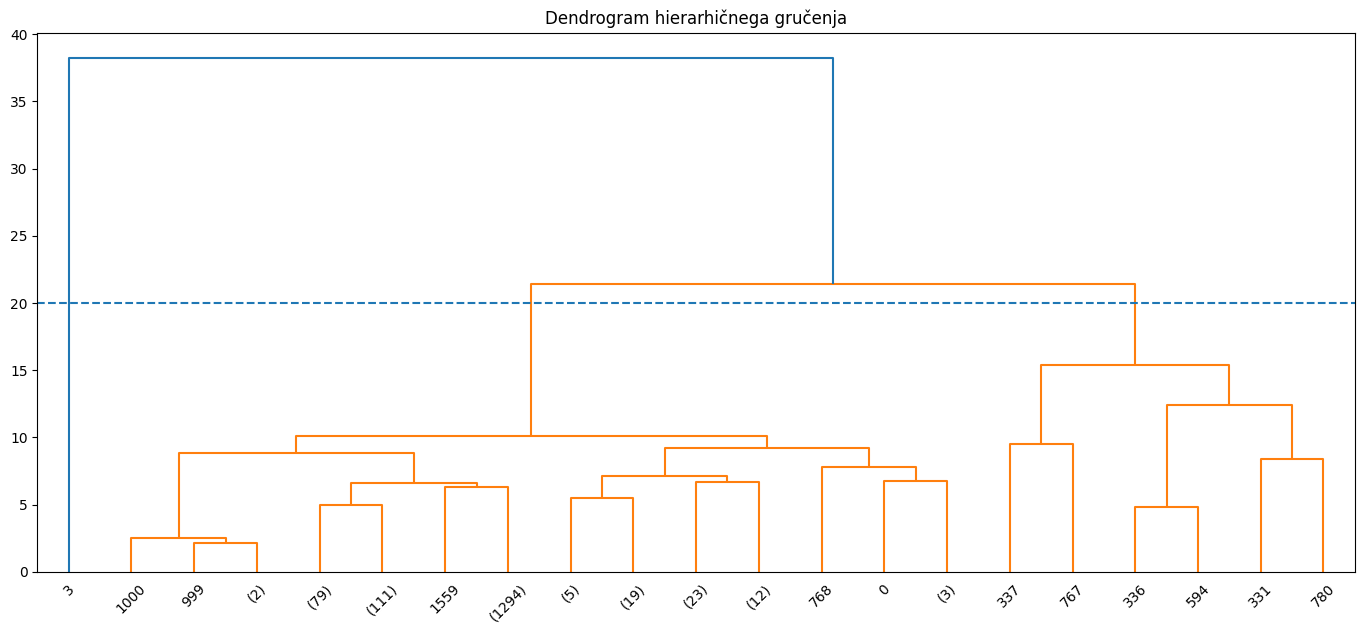

In [ ]:
max_nivo=5
plt.figure(figsize=(17,7))
plt.title("Dendrogram hierarhičnega gručenja")
dendrogram(Z, p=max_nivo, truncate_mode="level")
plt.axhline(y=20, ls="dashed")
plt.show()

Iz dendrograma je razvidno, da je najbolj primerna delitev na 3 gruče

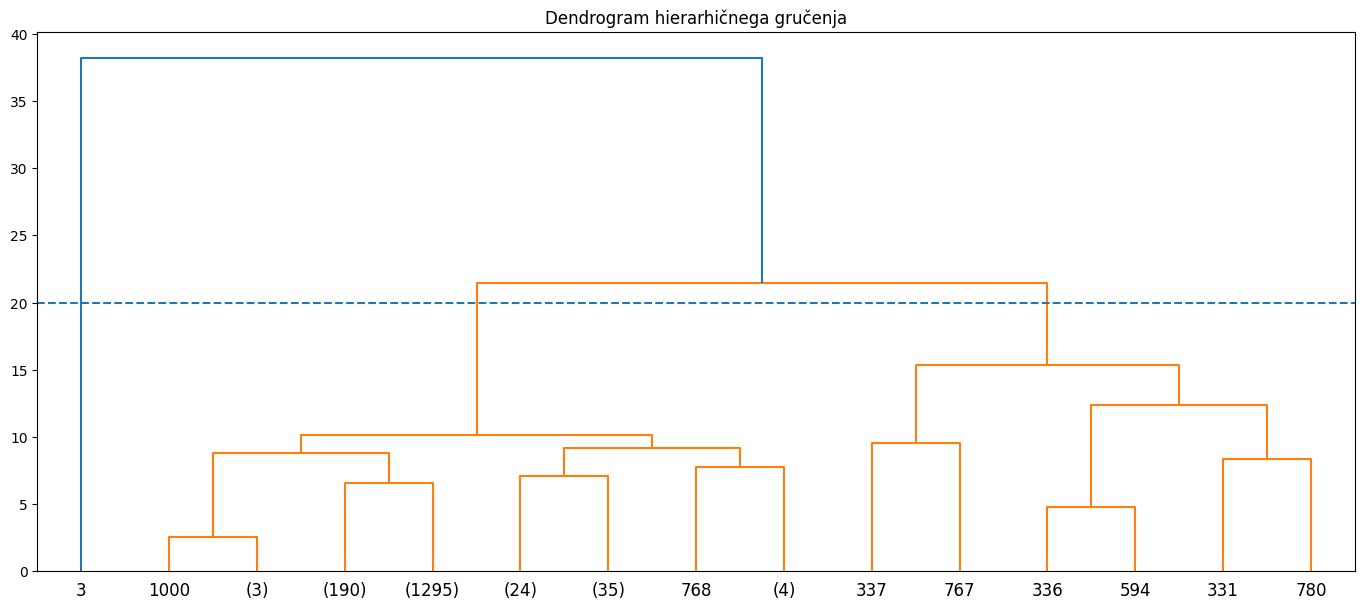

In [ ]:
max_nivo=4
plt.figure(figsize=(17,7))
plt.title("Dendrogram hierarhičnega gručenja")
dendrogram(Z, p=max_nivo, truncate_mode="level")
plt.axhline(y=20, ls="dashed")
plt.show()

Enak rezultat

## 4.2 K-means gručenje

In [ ]:
from sklearn.cluster import KMeans
import collections

In [ ]:
vrednosti_inerkcije = {}

for i in range (1,8):
  km = KMeans(n_clusters=i, n_init="auto").fit(df1)
  df_copy = df1.copy()
  df_copy["Gruce"] = km.labels_
  vrednosti_inerkcije[i] = km.inertia_
  print(vrednosti_inerkcije[i])

27511.21153846153
26363.331347013554
14721.38763072896
12564.92235652584
11402.562827593938
10867.896856455678
9635.023349370524


Text(0.5, 0, 'Stevilo gruc')

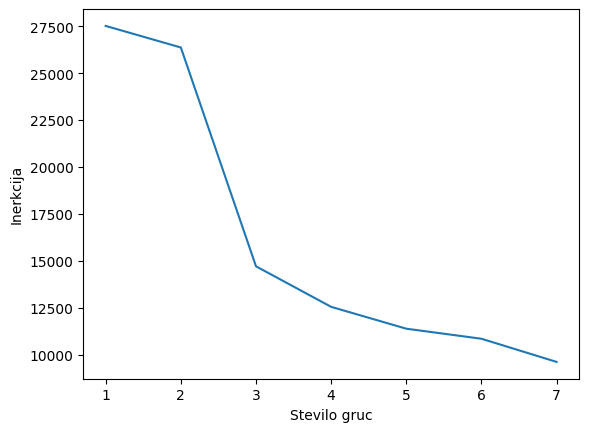

In [ ]:
sns.lineplot(x=list(vrednosti_inerkcije.keys()), y=list(vrednosti_inerkcije.values()))
plt.ylabel("Inerkcija")
plt.xlabel("Stevilo gruc")

Po metodi komolca, deluje najbolj primerno deliti na 3 ali 4 gruče

GRUČENJE NA 3 GRUČE

In [ ]:
km1 = KMeans(n_clusters=3, random_state=0).fit(df1)
km1.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 2, ..., 1, 0, 1], dtype=int32)

In [ ]:
collections.Counter(km1.labels_)

Counter({2: 144, 0: 515, 1: 901})

PCA TRANSFORMACIJA NA 3 KOMPONENTE

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(df1)

df_principal = pd.DataFrame(principalComponents, columns=("Component1", "Component2", "Component3"))

df_principal.head(3)

,Component1,Component2,Component3
0,10.855712,4.503028,2.114795
1,12.618982,3.683428,3.140634
2,12.820478,4.509812,4.606502


3D IZRIS

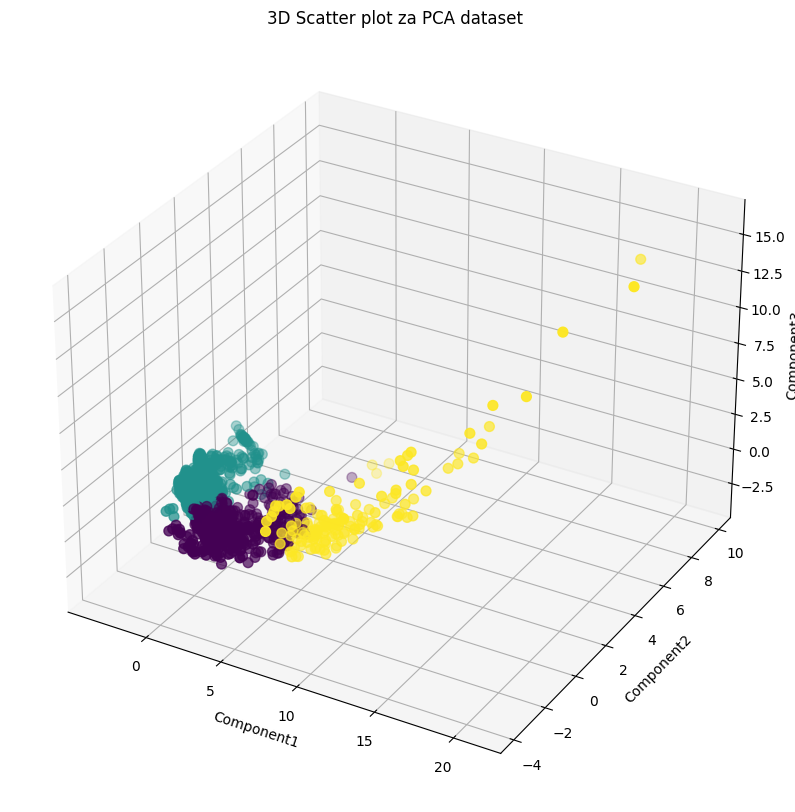

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection="3d")

scatter = ax.scatter(df_principal["Component1"], df_principal["Component2"], df_principal["Component3"], c=km1.labels_, cmap="viridis", s=50)

ax.set_xlabel("Component1")
ax.set_ylabel("Component2")
ax.set_zlabel("Component3")

plt.title("3D Scatter plot za PCA dataset")
plt.show()

PCA NA 2 KOMPONENTI

In [ ]:
pca2 = PCA(n_components=2)
principalComponents2 = pca2.fit_transform(df1)

df_principal2 = pd.DataFrame(principalComponents2, columns=("Component1", "Component2"))

df_principal2.head(3)

,Component1,Component2
0,10.855712,4.503028
1,12.618982,3.683428
2,12.820478,4.509812


2D IZRIS

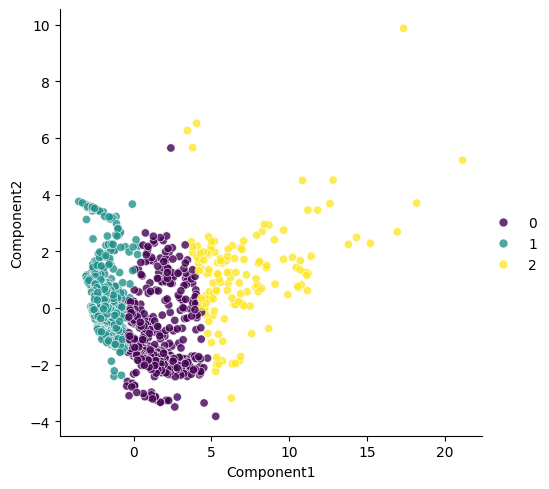

In [ ]:
sns.relplot(x="Component1", y="Component2", data=df_principal2, hue=km1.labels_, alpha=.8, palette="viridis")

GRUČENJE NA 4 GRUČE

In [ ]:
km2 = KMeans(n_clusters=4, random_state=0).fit(df1)
collections.Counter(km2.labels_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Counter({3: 32, 2: 197, 0: 442, 1: 889})

IZRIS ZA 4 GRUČE

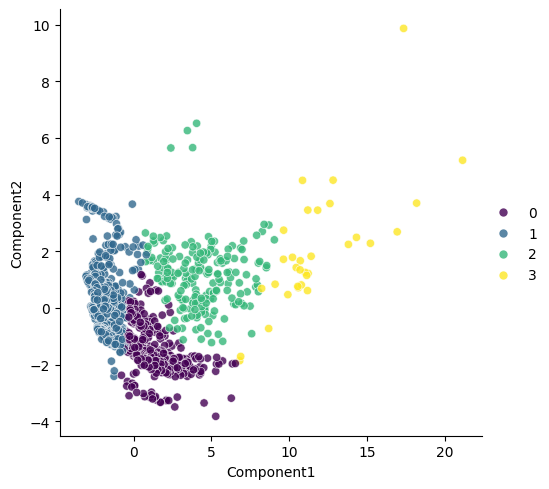

In [ ]:
sns.relplot(x="Component1", y="Component2", data=df_principal2, hue=km2.labels_, alpha=.8, palette="viridis")

In [ ]:
file_path = "/content/drive/MyDrive/data/ski_resorts_stevilski_standard_dummy.csv"
df1.to_csv(file_path, sep=",", decimal=".")

# 5. KLASIFIKACIJA

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/data/ski_resorts_4.0.csv", index_col=0, sep=",", decimal=".")
df.head()

,Rate,Km_Freeride,Continent,Country,Altitude,Easy,Intermediate_,Difficult,Adult,Currency,Size,Slope_offering,Lifts,Après-ski_,Snow_parks_,Cross_country,latitude,longitude,Total_Kms,Resort_Quality
NameResort,,,,,,,,,,,,,,,,,,,,
KitzSki – Kitzbühel/Kirchberg,4.9,45.0,Europe,Austria,2000.0,101.0,61.0,17.0,55.0,European Euro,5.0,5.0,5.0,4.0,5.0,5.0,47.516231,14.550072,179,Excellent
Ischgl/Samnaun – Silvretta Arena,4.8,15.0,Europe,Austria,2872.0,47.0,142.0,49.0,53.0,European Euro,5.0,5.0,5.0,5.0,5.0,4.0,47.516231,14.550072,238,Excellent
SkiWelt Wilder Kaiser-Brixental,4.8,26.0,Europe,Austria,1957.0,122.0,129.0,33.0,49.0,European Euro,5.0,5.0,5.0,4.0,5.0,5.0,47.516231,14.550072,284,Excellent
Ski Arlberg,4.8,200.0,Europe,Austria,2811.0,132.0,123.0,50.0,53.0,European Euro,5.0,5.0,5.0,5.0,4.0,4.0,47.516231,14.550072,305,Excellent
Serfaus-Fiss-Ladis,4.8,28.0,Europe,Austria,2820.0,47.0,123.0,28.0,51.0,European Euro,5.0,5.0,5.0,4.0,5.0,4.0,47.516231,14.550072,198,Excellent


In [ ]:
df.dtypes

In [ ]:
df.isnull().sum()

## 4.1 Indikacijski parametri - dummy vrednosti

In [ ]:
kategoricni = df.select_dtypes(include="object").columns
stevilski = df.select_dtypes(exclude="object").columns

print(kategoricni)
print(stevilski)

Index(['Continent', 'Country', 'Currency', 'Resort_Quality'], dtype='object')
Index(['Rate', 'Km_Freeride', 'Altitude', 'Easy', 'Intermediate_', 'Difficult',
       'Adult', 'Size', 'Slope_offering', 'Lifts', 'Après-ski_', 'Snow_parks_',
       'Cross_country', 'latitude', 'longitude', 'Total_Kms'],
      dtype='object')


In [ ]:
izhod = "Resort_Quality"
kategoricni_brez_izhoda = kategoricni.drop(izhod)

print(kategoricni_brez_izhoda)

Index(['Continent', 'Country', 'Currency'], dtype='object')


STANDARDIZACIJA ŠTEVILSKIH

In [ ]:
from sklearn.preprocessing import StandardScaler

df1 = df.copy(deep=True)
df1.head(2)

,Rate,Km_Freeride,Continent,Country,Altitude,Easy,Intermediate_,Difficult,Adult,Currency,Size,Slope_offering,Lifts,Après-ski_,Snow_parks_,Cross_country,latitude,longitude,Total_Kms,Resort_Quality
NameResort,,,,,,,,,,,,,,,,,,,,
KitzSki – Kitzbühel/Kirchberg,4.9,45.0,Europe,Austria,2000.0,101.0,61.0,17.0,55.0,European Euro,5.0,5.0,5.0,4.0,5.0,5.0,47.516231,14.550072,179,Excellent
Ischgl/Samnaun – Silvretta Arena,4.8,15.0,Europe,Austria,2872.0,47.0,142.0,49.0,53.0,European Euro,5.0,5.0,5.0,5.0,5.0,4.0,47.516231,14.550072,238,Excellent


In [ ]:
df1[stevilski] = StandardScaler().fit_transform(df1[stevilski])
df1.head(3)

,Rate,Km_Freeride,Continent,Country,Altitude,Easy,Intermediate_,Difficult,Adult,Currency,Size,Slope_offering,Lifts,Après-ski_,Snow_parks_,Cross_country,latitude,longitude,Total_Kms,Resort_Quality
NameResort,,,,,,,,,,,,,,,,,,,,
KitzSki – Kitzbühel/Kirchberg,2.660039,7.745664,Europe,Austria,0.728344,4.691884,2.521460,2.134006,2.029985,European Euro,3.274654,2.504437,2.532156,3.121436,3.679638,3.476090,-0.01722,0.708571,3.596982,Excellent
Ischgl/Samnaun – Silvretta Arena,2.563853,2.511298,Europe,Austria,1.950779,1.958186,6.443805,6.859833,1.886260,European Euro,3.274654,2.504437,2.532156,4.306792,3.679638,2.499203,-0.01722,0.708571,4.928282,Excellent
SkiWelt Wilder Kaiser-Brixental,2.563853,4.430566,Europe,Austria,0.668064,5.754988,5.814292,4.496920,1.598809,European Euro,3.274654,2.504437,2.532156,3.121436,3.679638,3.476090,-0.01722,0.708571,5.966244,Excellent


DUMMY VREDNOSTI

In [ ]:
df1 = pd.get_dummies(df1, columns=kategoricni_brez_izhoda)
df1.head()

,Rate,Km_Freeride,Altitude,Easy,Intermediate_,Difficult,Adult,Size,Slope_offering,Lifts,...,Country_Lithuania,Country_Montenegro,Country_Netherlands,Country_Portugal,Country_Slovakia,Country_Slovenia,Country_Spain,Country_Switzerland,Currency_European Euro,Currency_Swiss Franc
NameResort,,,,,,,,,,,,,,,,,,,,,
KitzSki – Kitzbühel/Kirchberg,2.660039,7.745664,0.728344,4.691884,2.521460,2.134006,2.029985,3.274654,2.504437,2.532156,...,0,0,0,0,0,0,0,0,1,0
Ischgl/Samnaun – Silvretta Arena,2.563853,2.511298,1.950779,1.958186,6.443805,6.859833,1.886260,3.274654,2.504437,2.532156,...,0,0,0,0,0,0,0,0,1,0
SkiWelt Wilder Kaiser-Brixental,2.563853,4.430566,0.668064,5.754988,5.814292,4.496920,1.598809,3.274654,2.504437,2.532156,...,0,0,0,0,0,0,0,0,1,0
Ski Arlberg,2.563853,34.789883,1.865265,6.261229,5.523748,7.007515,1.886260,3.274654,2.504437,2.532156,...,0,0,0,0,0,0,0,0,1,0
Serfaus-Fiss-Ladis,2.563853,4.779523,1.877882,1.958186,5.523748,3.758509,1.742534,3.274654,2.504437,2.532156,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
df1.dtypes

KLASIFIKACIJA

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

vhod = df1.columns.drop(izhod)
print(vhod)

Index(['Rate', 'Km_Freeride', 'Altitude', 'Easy', 'Intermediate_', 'Difficult',
       'Adult', 'Size', 'Slope_offering', 'Lifts', 'Après-ski_', 'Snow_parks_',
       'Cross_country', 'latitude', 'longitude', 'Total_Kms', 'Continent_Asia',
       'Continent_Europe', 'Country_Andorra', 'Country_Austria',
       'Country_Belgium', 'Country_Cyprus', 'Country_Estonia',
       'Country_Finland', 'Country_France', 'Country_Germany',
       'Country_Greece', 'Country_Italy', 'Country_Kosovo',
       'Country_Liechtenstein', 'Country_Lithuania', 'Country_Montenegro',
       'Country_Netherlands', 'Country_Portugal', 'Country_Slovakia',
       'Country_Slovenia', 'Country_Spain', 'Country_Switzerland',
       'Currency_European Euro', 'Currency_Swiss Franc'],
      dtype='object')


In [ ]:
from sklearn import metrics

x_train, x_test, y_train, y_test = train_test_split(df1[vhod], df1[izhod], test_size=0.3, random_state=999)

dt = DecisionTreeClassifier(criterion="gini", max_depth=5)
dt.fit(x_train, y_train)

rezultat = dt.predict(x_test)
print("Točnost Decision tree klasifikatorja:")
print(metrics.accuracy_score(y_test, rezultat))

Točnost Decision tree klasifikatorja:
1.0


ker DEcisionTreeClassifier dosega zelo visoko natančnost, bo verjetno potrebno odstraniti Rate iz vhoda.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=4)
kn.fit(x_train, y_train)

rez = kn.predict(x_test)

print("Tocnost:")
print(metrics.accuracy_score(y_test, rez))

Tocnost:
0.9358974358974359


STRATIFICIRANA NAVZKRIŽNA VALIDACIJA

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [ ]:
klasifikatorji=[]
klasifikatorji.append(DecisionTreeClassifier(max_depth=6))
klasifikatorji.append(LogisticRegression(max_iter=2000))
klasifikatorji.append(LinearSVC(max_iter=1000))
klasifikatorji.append(KNeighborsClassifier(n_neighbors=5))
klasifikatorji.append(GaussianNB())
klasifikatorji.append(RandomForestClassifier())
klasifikatorji.append(ExtraTreesClassifier())
klasifikatorji.append(AdaBoostClassifier())
klasifikatorji.append(GradientBoostingClassifier())

In [ ]:
rezultati = []
for k in klasifikatorji:
  kf = StratifiedKFold(n_splits=6)
  rezultat_klasifikatorja = cross_val_score(k, df1[vhod], df1[izhod], cv=kf, scoring="accuracy")

  rezultati.append(rezultat_klasifikatorja.mean())
  print(type(k).__name__, rezultat_klasifikatorja.mean())

DecisionTreeClassifier 1.0
LogisticRegression 0.8782051282051281


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

LinearSVC 0.8961538461538461
KNeighborsClassifier 0.7442307692307693
GaussianNB 0.4307692307692308
RandomForestClassifier 0.9948717948717949
ExtraTreesClassifier 0.8621794871794872
AdaBoostClassifier 1.0
GradientBoostingClassifier 1.0


Rate odstranim iz vhoda

In [ ]:
vhod1 = df1.columns.drop(["Rate", izhod])
print(vhod1)

Index(['Km_Freeride', 'Altitude', 'Easy', 'Intermediate_', 'Difficult',
       'Adult', 'Size', 'Slope_offering', 'Lifts', 'Après-ski_', 'Snow_parks_',
       'Cross_country', 'latitude', 'longitude', 'Total_Kms', 'Continent_Asia',
       'Continent_Europe', 'Country_Andorra', 'Country_Austria',
       'Country_Belgium', 'Country_Cyprus', 'Country_Estonia',
       'Country_Finland', 'Country_France', 'Country_Germany',
       'Country_Greece', 'Country_Italy', 'Country_Kosovo',
       'Country_Liechtenstein', 'Country_Lithuania', 'Country_Montenegro',
       'Country_Netherlands', 'Country_Portugal', 'Country_Slovakia',
       'Country_Slovenia', 'Country_Spain', 'Country_Switzerland',
       'Currency_European Euro', 'Currency_Swiss Franc'],
      dtype='object')


In [ ]:
rezultati1 = []
for k in klasifikatorji:
  kf = StratifiedKFold(n_splits=6)
  rezultat_klasifikatorja = cross_val_score(k, df1[vhod1], df1[izhod], cv=kf, scoring="accuracy")

  rezultati.append(rezultat_klasifikatorja.mean())
  print(type(k).__name__, rezultat_klasifikatorja.mean())

DecisionTreeClassifier 0.866025641025641
LogisticRegression 0.826923076923077


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

LinearSVC 0.8019230769230768
KNeighborsClassifier 0.6865384615384617
GaussianNB 0.3230769230769231
RandomForestClassifier 0.8820512820512821
ExtraTreesClassifier 0.7314102564102564
AdaBoostClassifier 0.9205128205128207
GradientBoostingClassifier 0.8865384615384615


Ker je lastnost, ki jo želim napovedati (Resort_Quality) neposredno izpeljana iz Rate-a, sem tega odstranil iz vhoda in dobil dosti bolj realne rezultate.
V nadaljevanju bom delal z RandomForest klasifikatorjem, ker je bolj odporen na spremembe v učni množici

ISKANJE NAJBOLJŠIH PARAMETROV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

In [ ]:
parameters = {
    "n_estimators": sp_randint(10,120), "criterion": ["gini", "entropy", "log_loss"], "max_depth": sp_randint(2,30), "min_samples_leaf": sp_randint(1,5)
}

clf = RandomizedSearchCV(RandomForestClassifier(), parameters, cv=7, n_iter=50, scoring="accuracy")
clf.fit(df1[vhod1], df1[izhod])

print(clf.best_score_)
print(clf.best_params_)
print(clf.best_estimator_)

0.9108621754361665
{'criterion': 'log_loss', 'max_depth': 3, 'min_samples_leaf': 4, 'n_estimators': 35}
RandomForestClassifier(criterion='log_loss', max_depth=3, min_samples_leaf=4,
                       n_estimators=35)


Dosežena je 91% natančnost

## 5.2 Label Encoder

In [ ]:
df2 = df.copy(deep=True)
df2.head(3)

,Rate,Km_Freeride,Continent,Country,Altitude,Easy,Intermediate_,Difficult,Adult,Currency,Size,Slope_offering,Lifts,Après-ski_,Snow_parks_,Cross_country,latitude,longitude,Total_Kms,Resort_Quality
NameResort,,,,,,,,,,,,,,,,,,,,
KitzSki – Kitzbühel/Kirchberg,4.9,45.0,Europe,Austria,2000.0,101.0,61.0,17.0,55.0,European Euro,5.0,5.0,5.0,4.0,5.0,5.0,47.516231,14.550072,179,Excellent
Ischgl/Samnaun – Silvretta Arena,4.8,15.0,Europe,Austria,2872.0,47.0,142.0,49.0,53.0,European Euro,5.0,5.0,5.0,5.0,5.0,4.0,47.516231,14.550072,238,Excellent
SkiWelt Wilder Kaiser-Brixental,4.8,26.0,Europe,Austria,1957.0,122.0,129.0,33.0,49.0,European Euro,5.0,5.0,5.0,4.0,5.0,5.0,47.516231,14.550072,284,Excellent


In [ ]:
print(stevilski)
print(kategoricni_brez_izhoda)

Index(['Rate', 'Km_Freeride', 'Altitude', 'Easy', 'Intermediate_', 'Difficult',
       'Adult', 'Size', 'Slope_offering', 'Lifts', 'Après-ski_', 'Snow_parks_',
       'Cross_country', 'latitude', 'longitude', 'Total_Kms'],
      dtype='object')
Index(['Continent', 'Country', 'Currency'], dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
for k in kategoricni_brez_izhoda:
  df2[k] = LabelEncoder().fit_transform(df2[k])

df2.head()

,Rate,Km_Freeride,Continent,Country,Altitude,Easy,Intermediate_,Difficult,Adult,Currency,Size,Slope_offering,Lifts,Après-ski_,Snow_parks_,Cross_country,latitude,longitude,Total_Kms,Resort_Quality
NameResort,,,,,,,,,,,,,,,,,,,,
KitzSki – Kitzbühel/Kirchberg,4.9,45.0,1,1,2000.0,101.0,61.0,17.0,55.0,0,5.0,5.0,5.0,4.0,5.0,5.0,47.516231,14.550072,179,Excellent
Ischgl/Samnaun – Silvretta Arena,4.8,15.0,1,1,2872.0,47.0,142.0,49.0,53.0,0,5.0,5.0,5.0,5.0,5.0,4.0,47.516231,14.550072,238,Excellent
SkiWelt Wilder Kaiser-Brixental,4.8,26.0,1,1,1957.0,122.0,129.0,33.0,49.0,0,5.0,5.0,5.0,4.0,5.0,5.0,47.516231,14.550072,284,Excellent
Ski Arlberg,4.8,200.0,1,1,2811.0,132.0,123.0,50.0,53.0,0,5.0,5.0,5.0,5.0,4.0,4.0,47.516231,14.550072,305,Excellent
Serfaus-Fiss-Ladis,4.8,28.0,1,1,2820.0,47.0,123.0,28.0,51.0,0,5.0,5.0,5.0,4.0,5.0,4.0,47.516231,14.550072,198,Excellent


In [ ]:
stevilski2 = df2.select_dtypes(exclude="object").columns
print(stevilski2)

Index(['Rate', 'Km_Freeride', 'Continent', 'Country', 'Altitude', 'Easy',
       'Intermediate_', 'Difficult', 'Adult', 'Currency', 'Size',
       'Slope_offering', 'Lifts', 'Après-ski_', 'Snow_parks_', 'Cross_country',
       'latitude', 'longitude', 'Total_Kms'],
      dtype='object')


In [ ]:
df2[stevilski2] = StandardScaler().fit_transform(df2[stevilski2])
df2.head(3)

,Rate,Km_Freeride,Continent,Country,Altitude,Easy,Intermediate_,Difficult,Adult,Currency,Size,Slope_offering,Lifts,Après-ski_,Snow_parks_,Cross_country,latitude,longitude,Total_Kms,Resort_Quality
NameResort,,,,,,,,,,,,,,,,,,,,
KitzSki – Kitzbühel/Kirchberg,2.660039,7.745664,0.025327,-1.229659,0.728344,4.691884,2.521460,2.134006,2.029985,-0.437892,3.274654,2.504437,2.532156,3.121436,3.679638,3.476090,-0.01722,0.708571,3.596982,Excellent
Ischgl/Samnaun – Silvretta Arena,2.563853,2.511298,0.025327,-1.229659,1.950779,1.958186,6.443805,6.859833,1.886260,-0.437892,3.274654,2.504437,2.532156,4.306792,3.679638,2.499203,-0.01722,0.708571,4.928282,Excellent
SkiWelt Wilder Kaiser-Brixental,2.563853,4.430566,0.025327,-1.229659,0.668064,5.754988,5.814292,4.496920,1.598809,-0.437892,3.274654,2.504437,2.532156,3.121436,3.679638,3.476090,-0.01722,0.708571,5.966244,Excellent


In [ ]:
vhod2 = df2.columns.drop(["Rate", izhod])
print(vhod2)

Index(['Km_Freeride', 'Continent', 'Country', 'Altitude', 'Easy',
       'Intermediate_', 'Difficult', 'Adult', 'Currency', 'Size',
       'Slope_offering', 'Lifts', 'Après-ski_', 'Snow_parks_', 'Cross_country',
       'latitude', 'longitude', 'Total_Kms'],
      dtype='object')


KLASIFIKACIJA

'criterion': 'log_loss', 'max_depth': 3, 'min_samples_leaf': 4, 'n_estimators': 35}
RandomForestClassifier(criterion='log_loss', max_depth=3, min_samples_leaf=4,
                       n_estimators=35

In [ ]:
clf.fit(df2[vhod2], df2[izhod])

print(clf.best_score_)
print(clf.best_params_)
print(clf.best_estimator_)

0.9127840204073389
{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'n_estimators': 81}
RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=81)


Natančnost je praktično ista kot pri indikacijskih parametrih (91%)

Klasifikacija z optimalnimi parametri iz klasifikacije z dummy vrednostmi:

In [ ]:
kf = StratifiedKFold(n_splits=7)
rezultat_klasifikatorja = cross_val_score(RandomForestClassifier(criterion="log_loss", max_depth=3, min_samples_leaf=4, n_estimators=35), df2[vhod2], df2[izhod], cv=kf, scoring="accuracy")
print(rezultat_klasifikatorja.mean())

0.907647557871773


RandomForestClassifier brez parametrov:

In [ ]:
kf = StratifiedKFold(n_splits=7)
rezultat_klasifikatorja = cross_val_score(RandomForestClassifier(), df2[vhod2], df2[izhod], cv=kf, scoring="accuracy")
print(rezultat_klasifikatorja.mean())

0.8955018439323371


# 6. REGRESIJA

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/data/ski_resorts_4.0.csv", index_col=0, sep=",", decimal=".")
df.head()

,Rate,Km_Freeride,Continent,Country,Altitude,Easy,Intermediate_,Difficult,Adult,Currency,Size,Slope_offering,Lifts,Après-ski_,Snow_parks_,Cross_country,latitude,longitude,Total_Kms,Resort_Quality
NameResort,,,,,,,,,,,,,,,,,,,,
KitzSki – Kitzbühel/Kirchberg,4.9,45.0,Europe,Austria,2000.0,101.0,61.0,17.0,55.0,European Euro,5.0,5.0,5.0,4.0,5.0,5.0,47.516231,14.550072,179,Excellent
Ischgl/Samnaun – Silvretta Arena,4.8,15.0,Europe,Austria,2872.0,47.0,142.0,49.0,53.0,European Euro,5.0,5.0,5.0,5.0,5.0,4.0,47.516231,14.550072,238,Excellent
SkiWelt Wilder Kaiser-Brixental,4.8,26.0,Europe,Austria,1957.0,122.0,129.0,33.0,49.0,European Euro,5.0,5.0,5.0,4.0,5.0,5.0,47.516231,14.550072,284,Excellent
Ski Arlberg,4.8,200.0,Europe,Austria,2811.0,132.0,123.0,50.0,53.0,European Euro,5.0,5.0,5.0,5.0,4.0,4.0,47.516231,14.550072,305,Excellent
Serfaus-Fiss-Ladis,4.8,28.0,Europe,Austria,2820.0,47.0,123.0,28.0,51.0,European Euro,5.0,5.0,5.0,4.0,5.0,4.0,47.516231,14.550072,198,Excellent


In [ ]:
kategoricni = df.select_dtypes(include="object").columns
stevilski = df.select_dtypes(exclude="object").columns

print(kategoricni)
print(stevilski)

Index(['Continent', 'Country', 'Currency', 'Resort_Quality'], dtype='object')
Index(['Rate', 'Km_Freeride', 'Altitude', 'Easy', 'Intermediate_', 'Difficult',
       'Adult', 'Size', 'Slope_offering', 'Lifts', 'Après-ski_', 'Snow_parks_',
       'Cross_country', 'latitude', 'longitude', 'Total_Kms'],
      dtype='object')


In [ ]:
izhod = "Adult"
stevilski_brez_izhoda = stevilski.drop(izhod)
print(stevilski_brez_izhoda)

Index(['Rate', 'Km_Freeride', 'Altitude', 'Easy', 'Intermediate_', 'Difficult',
       'Size', 'Slope_offering', 'Lifts', 'Après-ski_', 'Snow_parks_',
       'Cross_country', 'latitude', 'longitude', 'Total_Kms'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import StandardScaler

df1 = df.copy(deep=True)
df1.head(2)

,Rate,Km_Freeride,Continent,Country,Altitude,Easy,Intermediate_,Difficult,Adult,Currency,Size,Slope_offering,Lifts,Après-ski_,Snow_parks_,Cross_country,latitude,longitude,Total_Kms,Resort_Quality
NameResort,,,,,,,,,,,,,,,,,,,,
KitzSki – Kitzbühel/Kirchberg,4.9,45.0,Europe,Austria,2000.0,101.0,61.0,17.0,55.0,European Euro,5.0,5.0,5.0,4.0,5.0,5.0,47.516231,14.550072,179,Excellent
Ischgl/Samnaun – Silvretta Arena,4.8,15.0,Europe,Austria,2872.0,47.0,142.0,49.0,53.0,European Euro,5.0,5.0,5.0,5.0,5.0,4.0,47.516231,14.550072,238,Excellent


In [ ]:
df1[stevilski_brez_izhoda] = StandardScaler().fit_transform(df1[stevilski_brez_izhoda])
df1.head(3)

,Rate,Km_Freeride,Continent,Country,Altitude,Easy,Intermediate_,Difficult,Adult,Currency,Size,Slope_offering,Lifts,Après-ski_,Snow_parks_,Cross_country,latitude,longitude,Total_Kms,Resort_Quality
NameResort,,,,,,,,,,,,,,,,,,,,
KitzSki – Kitzbühel/Kirchberg,2.660039,7.745664,Europe,Austria,0.728344,4.691884,2.521460,2.134006,55.0,European Euro,3.274654,2.504437,2.532156,3.121436,3.679638,3.476090,-0.01722,0.708571,3.596982,Excellent
Ischgl/Samnaun – Silvretta Arena,2.563853,2.511298,Europe,Austria,1.950779,1.958186,6.443805,6.859833,53.0,European Euro,3.274654,2.504437,2.532156,4.306792,3.679638,2.499203,-0.01722,0.708571,4.928282,Excellent
SkiWelt Wilder Kaiser-Brixental,2.563853,4.430566,Europe,Austria,0.668064,5.754988,5.814292,4.496920,49.0,European Euro,3.274654,2.504437,2.532156,3.121436,3.679638,3.476090,-0.01722,0.708571,5.966244,Excellent


In [ ]:
df1 = pd.get_dummies(df1, columns=kategoricni)
df1.head(3)

,Rate,Km_Freeride,Altitude,Easy,Intermediate_,Difficult,Adult,Size,Slope_offering,Lifts,...,Country_Portugal,Country_Slovakia,Country_Slovenia,Country_Spain,Country_Switzerland,Currency_European Euro,Currency_Swiss Franc,Resort_Quality_Bad,Resort_Quality_Excellent,Resort_Quality_Good
NameResort,,,,,,,,,,,,,,,,,,,,,
KitzSki – Kitzbühel/Kirchberg,2.660039,7.745664,0.728344,4.691884,2.521460,2.134006,55.0,3.274654,2.504437,2.532156,...,0,0,0,0,0,1,0,0,1,0
Ischgl/Samnaun – Silvretta Arena,2.563853,2.511298,1.950779,1.958186,6.443805,6.859833,53.0,3.274654,2.504437,2.532156,...,0,0,0,0,0,1,0,0,1,0
SkiWelt Wilder Kaiser-Brixental,2.563853,4.430566,0.668064,5.754988,5.814292,4.496920,49.0,3.274654,2.504437,2.532156,...,0,0,0,0,0,1,0,0,1,0


In [ ]:
vhod = df1.columns.drop(izhod)
print(vhod)

Index(['Rate', 'Km_Freeride', 'Altitude', 'Easy', 'Intermediate_', 'Difficult',
       'Size', 'Slope_offering', 'Lifts', 'Après-ski_', 'Snow_parks_',
       'Cross_country', 'latitude', 'longitude', 'Total_Kms', 'Continent_Asia',
       'Continent_Europe', 'Country_Andorra', 'Country_Austria',
       'Country_Belgium', 'Country_Cyprus', 'Country_Estonia',
       'Country_Finland', 'Country_France', 'Country_Germany',
       'Country_Greece', 'Country_Italy', 'Country_Kosovo',
       'Country_Liechtenstein', 'Country_Lithuania', 'Country_Montenegro',
       'Country_Netherlands', 'Country_Portugal', 'Country_Slovakia',
       'Country_Slovenia', 'Country_Spain', 'Country_Switzerland',
       'Currency_European Euro', 'Currency_Swiss Franc', 'Resort_Quality_Bad',
       'Resort_Quality_Excellent', 'Resort_Quality_Good'],
      dtype='object')


## 6.1 Testna regresija

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor

x_train, x_test, y_train, y_test = train_test_split(df1[vhod], df1[izhod], test_size=0.3, random_state=123)

regresor = DecisionTreeRegressor()
regresor.fit(x_train, y_train)

rezultat = regresor.predict(x_test)

print(mean_absolute_error(y_test, rezultat))
print(mean_squared_error(y_test, rezultat))

5.342307692307692
60.502692307692314


In [ ]:
dfrez = pd.DataFrame({'Dejanska': y_test, 'Napovedana': rezultat})
dfrez.head(10)

,Dejanska,Napovedana
NameResort,,
jeizinen-feselalp-gampelsteg,42.0,35.0
passy-plaine-joux,18.0,19.5
Hintertux Glacier (Hintertuxer Gletscher),52.0,46.0
meander-skipark-oravice,25.0,30.0
. Ruka,44.0,51.5
pintura-bolognola,19.0,20.0
josefsberg-mitterbach-am-erlaufsee,22.5,15.0
les-plans-dhotonnes,17.5,18.0
serre-eyraud-orcieres,14.9,13.0


## 6.2 Iskanje primernega regresorskega algoritma

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

In [ ]:
regresorji = []
regresorji.append(LinearRegression())
regresorji.append(DecisionTreeRegressor())
regresorji.append(LinearSVR())
regresorji.append(RandomForestRegressor())
regresorji.append(ExtraTreesRegressor())

In [ ]:
for r in regresorji:
  kf = KFold(n_splits=6)
  rezultatKF = cross_val_score(r, df1[vhod], df1[izhod], cv=kf, scoring="neg_mean_absolute_error")
  print(type(r).__name__, rezultatKF.mean())

LinearRegression -23741859099.719845
DecisionTreeRegressor -7.105794871794871
LinearSVR -5.528478341117015
RandomForestRegressor -5.7079746794871795
ExtraTreesRegressor -5.691488333333335


## 6.3 Optimizacija regresije

In [ ]:
corr = df.corr()

<ipython-input-13-45893e33df67>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


In [ ]:
from matplotlib import pyplot as plt

<Axes: >

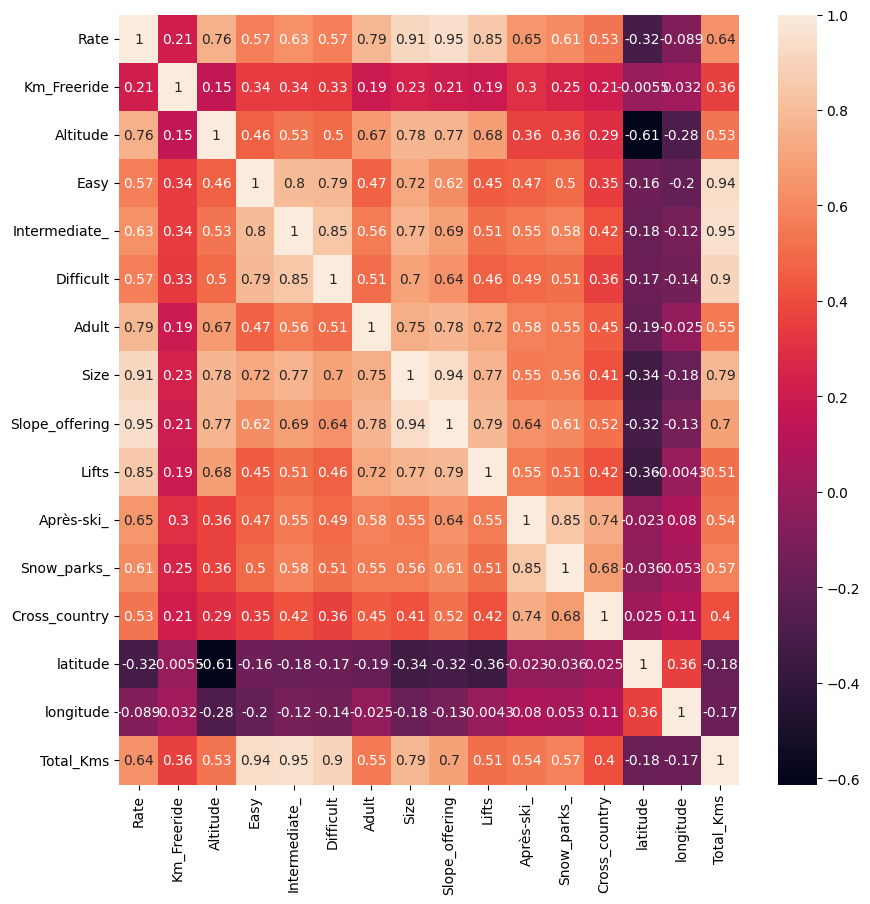

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)

Opazno je, da na ceno karte najbolj vplivajo lastnosti: Rate, Size, Slope_Offering in Lifts

### 6.3.1 Feature Selection

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df1[["Rate", "Altitude", "Size", "Slope_offering", "Lifts"]], df1[izhod], test_size=0.3, random_state=123)

regresor = LinearSVR()
regresor.fit(x_train, y_train)

rezultat = regresor.predict(x_test)

print(mean_absolute_error(y_test, rezultat))
print(mean_squared_error(y_test, rezultat))

5.8897977569255815
62.84055468203909


In [ ]:
for r in regresorji:
  kf = KFold(n_splits=6)
  rezultatKF = cross_val_score(r, df1[["Rate", "Altitude", "Size", "Slope_offering", "Lifts"]], df1[izhod], cv=kf, scoring="neg_mean_absolute_error")
  print(type(r).__name__, rezultatKF.mean())

LinearRegression -6.9199024583468605
DecisionTreeRegressor -8.958268162393164
LinearSVR -6.7681561921099584
RandomForestRegressor -7.26649301994302
ExtraTreesRegressor -7.777337350427351


Opazno je, da se s feature selection-om drastično iboljša le linearna regresija

Dodajanje polinomskih feature-jev

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df1[["Rate", "Altitude", "Size", "Slope_offering", "Lifts"]], df1[izhod], test_size=0.25, random_state=42)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
degree = 3
poly_features = PolynomialFeatures(degree=degree, include_bias=False)

In [ ]:
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [ ]:
model = LinearRegression()
model.fit(X_train_poly, Y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test_poly)

In [ ]:
print(mean_squared_error(Y_test, y_pred))
print(mean_absolute_error(Y_test, y_pred))

66.39740668057622
6.125675805274645


### 6.3.2 Polinomska regresija

In [ ]:
df2 = df.copy(deep=True)
df2.head(2)

,Rate,Km_Freeride,Continent,Country,Altitude,Easy,Intermediate_,Difficult,Adult,Currency,Size,Slope_offering,Lifts,Après-ski_,Snow_parks_,Cross_country,latitude,longitude,Total_Kms,Resort_Quality
NameResort,,,,,,,,,,,,,,,,,,,,
KitzSki – Kitzbühel/Kirchberg,4.9,45.0,Europe,Austria,2000.0,101.0,61.0,17.0,55.0,European Euro,5.0,5.0,5.0,4.0,5.0,5.0,47.516231,14.550072,179,Excellent
Ischgl/Samnaun – Silvretta Arena,4.8,15.0,Europe,Austria,2872.0,47.0,142.0,49.0,53.0,European Euro,5.0,5.0,5.0,5.0,5.0,4.0,47.516231,14.550072,238,Excellent


In [ ]:
df2 = pd.get_dummies(df2, columns=kategoricni)
df2.head(3)

,Rate,Km_Freeride,Altitude,Easy,Intermediate_,Difficult,Adult,Size,Slope_offering,Lifts,...,Country_Portugal,Country_Slovakia,Country_Slovenia,Country_Spain,Country_Switzerland,Currency_European Euro,Currency_Swiss Franc,Resort_Quality_Bad,Resort_Quality_Excellent,Resort_Quality_Good
NameResort,,,,,,,,,,,,,,,,,,,,,
KitzSki – Kitzbühel/Kirchberg,4.9,45.0,2000.0,101.0,61.0,17.0,55.0,5.0,5.0,5.0,...,0,0,0,0,0,1,0,0,1,0
Ischgl/Samnaun – Silvretta Arena,4.8,15.0,2872.0,47.0,142.0,49.0,53.0,5.0,5.0,5.0,...,0,0,0,0,0,1,0,0,1,0
SkiWelt Wilder Kaiser-Brixental,4.8,26.0,1957.0,122.0,129.0,33.0,49.0,5.0,5.0,5.0,...,0,0,0,0,0,1,0,0,1,0


In [ ]:
vhod2 = df2.columns.drop(izhod)
print(vhod2)

Index(['Rate', 'Km_Freeride', 'Altitude', 'Easy', 'Intermediate_', 'Difficult',
       'Size', 'Slope_offering', 'Lifts', 'Après-ski_', 'Snow_parks_',
       'Cross_country', 'latitude', 'longitude', 'Total_Kms', 'Continent_Asia',
       'Continent_Europe', 'Country_Andorra', 'Country_Austria',
       'Country_Belgium', 'Country_Cyprus', 'Country_Estonia',
       'Country_Finland', 'Country_France', 'Country_Germany',
       'Country_Greece', 'Country_Italy', 'Country_Kosovo',
       'Country_Liechtenstein', 'Country_Lithuania', 'Country_Montenegro',
       'Country_Netherlands', 'Country_Portugal', 'Country_Slovakia',
       'Country_Slovenia', 'Country_Spain', 'Country_Switzerland',
       'Currency_European Euro', 'Currency_Swiss Franc', 'Resort_Quality_Bad',
       'Resort_Quality_Excellent', 'Resort_Quality_Good'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2[vhod2], df2[izhod], test_size=0.25, random_state=1)

SKALIRANJE PODATKOV

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()

UVEDBA POLINOMSKIH STOPENJ V LINEARNO REGRESIJO

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4)
X_poly_train = poly.fit_transform(X_train_scaler)
X_test_poly = poly.transform(X_test_scaler)

poly.fit(X_poly_train, y_train)
lin.fit(X_poly_train, y_train)

LinearRegression()

In [ ]:
y_pred = lin.predict(X_test_poly)

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

138633795574.74792

In [ ]:
y_pred_train = lin.predict(X_poly_train)
mean_absolute_error(y_train, y_pred_train)

0.3091916568126434

OPAZEN JE OVERFITTING, KER SE NAPOVED PREVEČ PRILEGA UČNIM PODATKOM

### 6.3.3 L2 regularizacija

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline


alpha = 1  # stopnja regularizacije
ridge = Ridge(alpha=alpha)

# PIPELINE
model = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(), ridge)

model.fit(X_train, y_train)

# NAPOVED
y_pred = model.predict(X_test)

mae_test = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error on Test Set:", mae_test)

y_pred_train = model.predict(X_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error on Training Set:", mae_train)

Mean Absolute Error on Test Set: 6.918646930069649
Mean Absolute Error on Training Set: 3.433434482390659


### 6.3.4 L1 regularizacija

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline

alpha = 0.1  # stopnja regularizacije
lasso = Lasso(alpha=alpha)

# PIPELINE
model = make_pipeline(PolynomialFeatures(degree=3), StandardScaler(), lasso)

model.fit(X_train, y_train)

# NAPOVED
y_pred = model.predict(X_test)

mae_test = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error on Test Set:", mae_test)

y_pred_train = model.predict(X_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error on Training Set:", mae_train)

Mean Absolute Error on Test Set: 4.837119167348391
Mean Absolute Error on Training Set: 3.8082363574927713


Najboljše rezultate da pipeline z L1 regularizacijo

In [ ]:
df_rezultati_lasso = pd.DataFrame({'Dejanska': y_test, 'Napovedana': y_pred})
df_rezultati_lasso.head(10)

,Dejanska,Napovedana
NameResort,,
gschwend,12.0,14.255877
holzhausen,6.0,10.017377
furtnerlifts-rohr-im-gebirge,24.0,19.668064
wiriehorn,48.0,40.256270
cioss-prato-bedretto,15.0,22.054082
heimenschwand-buchholterberg,28.0,21.072649
schwabenwiese-mindelheim,6.0,10.527649
nods,16.0,19.680959
schwaebeleholzlift-sonthofen,9.0,14.118297


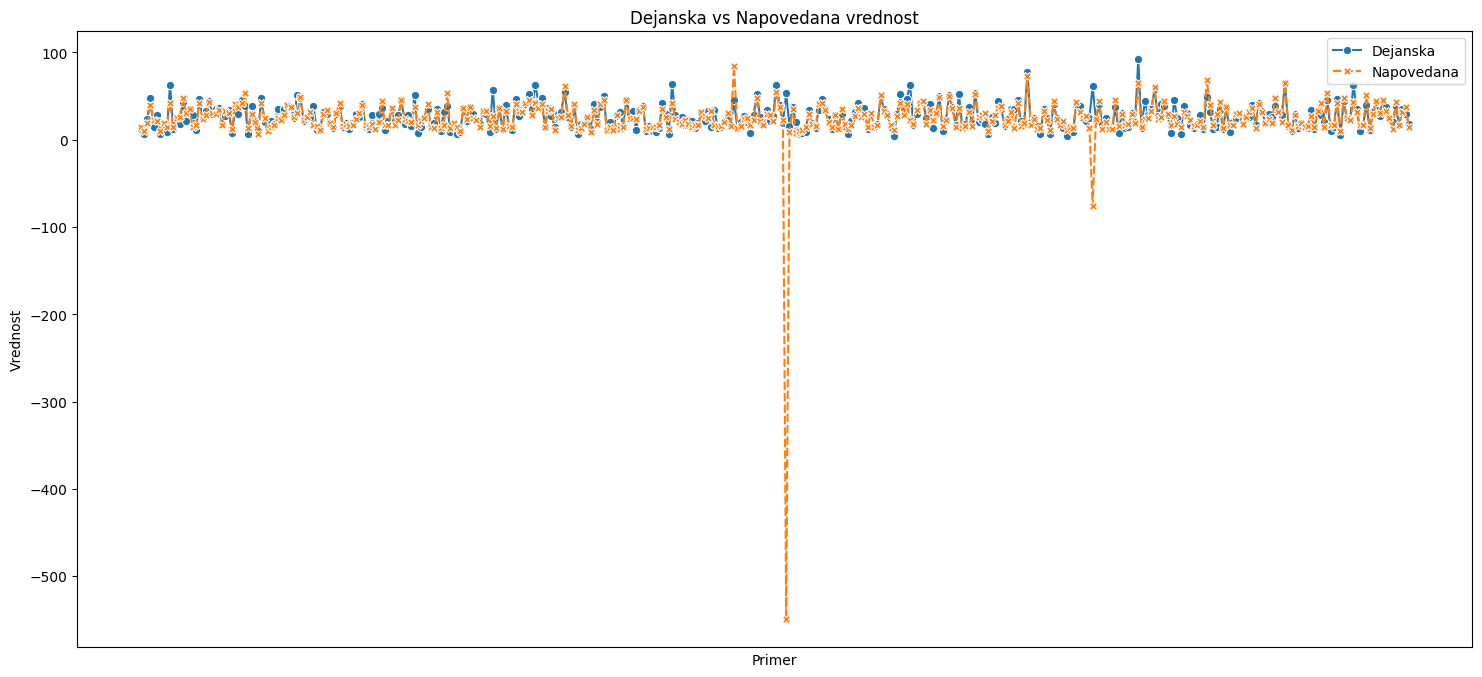

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18,8))

sns.lineplot(data=df_rezultati_lasso, markers=True)

plt.xlabel('Primer')
plt.ylabel('Vrednost')
plt.title('Dejanska vs Napovedana vrednost')

plt.xticks([])

plt.show()

Model se je v treh primerih zelo zmotil

# 7. POVZETEK REZULTATOV


*   S klasifikacijo lahko z 91% natančnostjo napovem kvaliteto smučišča.
*   Ob napovedi cene odrasle dnevne karte je povprečna absolutna napaka 4.8
*   Z rezultati si lahko pomagajo smučarji in ponudniki oz. lastniki smučišč
**  Lažje postavljanje cene kart
**  Bolj jasna slika o kvaliteti smučišča, v primeru, ko imamo podane druge osnovne podatke

Za boljšo napoved bi verjetno lahko iz dataframe-a izpustil zadnje instance - najslabša smučišča

